In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/test.csv')

In [3]:
train_df['month'] = pd.to_datetime(train_df['TIMESTAMP']).dt.month
train_df['day'] = pd.to_datetime(train_df['TIMESTAMP']).dt.day
train_df['hour'] = pd.to_datetime(train_df['TIMESTAMP']).dt.hour
train_df['minute'] = pd.to_datetime(train_df['TIMESTAMP']).dt.minute

In [ ]:
train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,month,day,hour,minute
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,77.77,NaN,NaN,NaN,NaN,NaN,6,13,5,14
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,72.55,NaN,NaN,NaN,NaN,NaN,6,13,5,22
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,78.35,NaN,NaN,NaN,NaN,NaN,6,13,5,30
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,71.78,NaN,NaN,NaN,NaN,NaN,6,13,5,39
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,76.97,NaN,NaN,NaN,NaN,NaN,6,13,5,47


# 결측치 확인

### 결측치만 있는 특성 확인

In [7]:
len(train_df.columns[train_df.isnull().sum() == len(train_df)]), len(test_df.columns[test_df.isnull().sum() == len(test_df)])

(82, 506)

### 결측치가 90% 이상인 특성 확인

In [10]:
len(train_df.columns[train_df.isnull().sum()>=len(train_df)*0.9]), len(test_df.columns[test_df.isnull().sum()>=len(test_df)*0.9])

(184, 734)

train 데이터보다 test 데이터가 결측치로 이루어진 특성이 많음

# Y_Quality를 통한 EDA

Y_Quality가 Y_Class를 결정하는 요인

### 상관관계가 높은 top 10 확인

In [20]:
# 결측치가 98퍼 이상인 특성은 drop
na_cols = train_df.columns[train_df.isnull().sum() >= len(train_df)*0.98]
train_df = train_df.drop(columns=na_cols)

In [21]:
train_df.corr()['Y_Quality'].dropna().map(abs).sort_values(ascending=False)[:10]

Y_Quality    1.000000
Y_Class      0.813885
X_318        0.707871
X_368        0.704872
X_367        0.704644
X_335        0.696087
X_1012       0.670464
X_1010       0.670464
X_2779       0.666837
X_1849       0.666606
Name: Y_Quality, dtype: float64

### 상관관계가 높은 특성으로 Y_Class 분포 분석

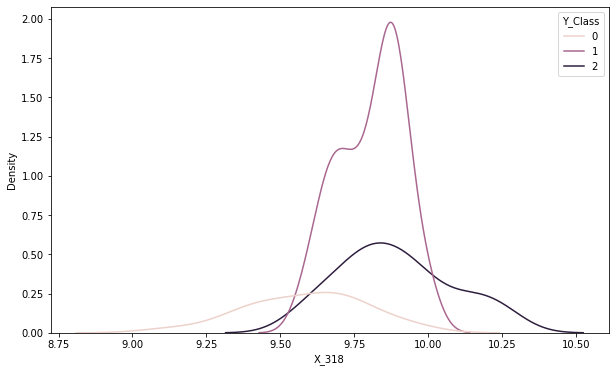

In [22]:
col = 'X_318'
plt.figure(figsize=(10,6))
sns.kdeplot(x = col, data=train_df, hue='Y_Class')

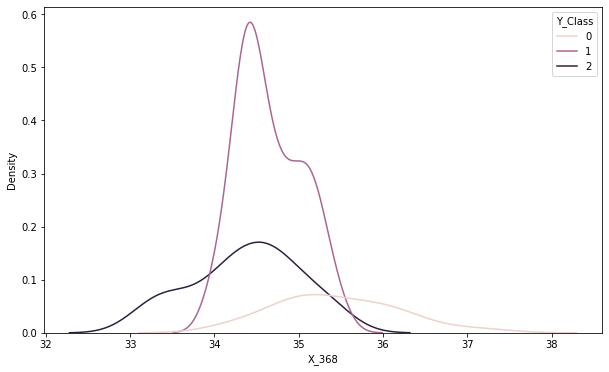

In [23]:
col = 'X_368'
plt.figure(figsize=(10,6))
sns.kdeplot(x = col, data=train_df, hue='Y_Class')

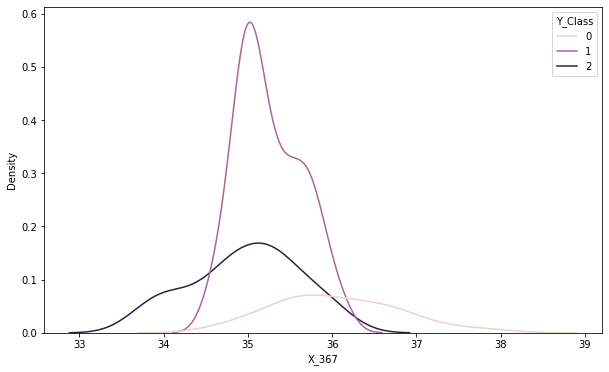

In [25]:
col = 'X_367'
plt.figure(figsize=(10,6))
sns.kdeplot(x = col, data=train_df, hue='Y_Class')

# 시간에 따른 EDA

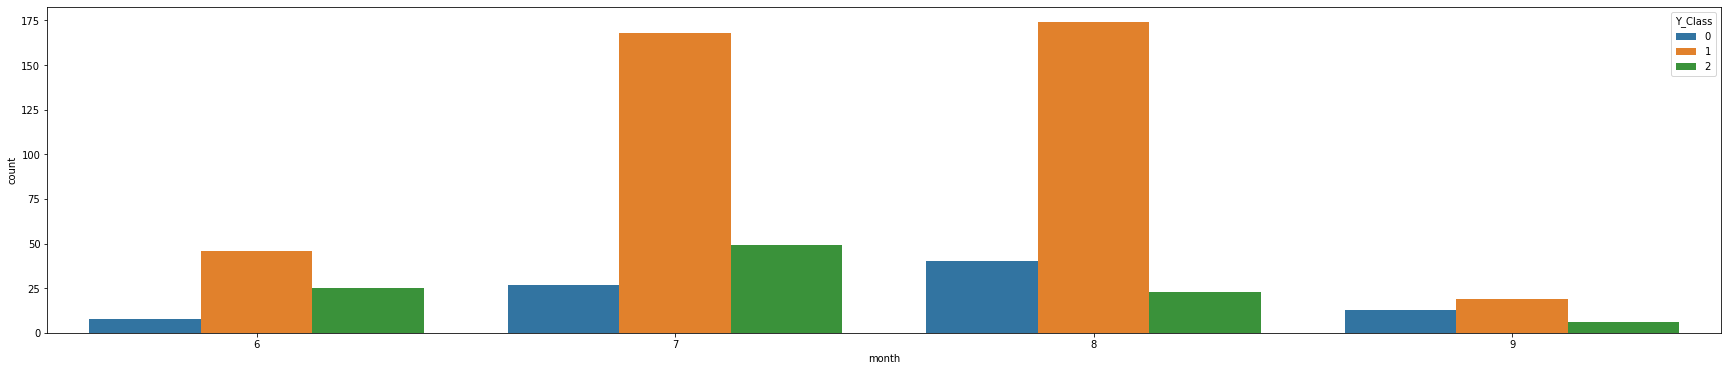

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x = 'month', data=train_df, hue='Y_Class')

# 고민해볼 것들

 - Y_Quality가 Y_Class를 결정하므로 Y_Quality를 예측하는 방향

 - 결측치가 너무 많다 특히 test 셋에 너무 많음 따라서 결측치 처리를 어떻게 할지

 - 학습에 사용되는 특성이 많다 따라서 Y_Quality와 상관관계가 높은 특성들만 사용해서 학습하는 것도 생각해볼만 함

 - 시간 데이터를 사용할 수 있는가?